In [1]:
import sys
!{sys.executable} -m pip install umap-learn

     |████████████████████████████████| 80 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 59.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 67.2 MB/s eta 0:00:01
     |████████████████████████████████| 25.3 MB 74.6 MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=5770ea86157ac4546fb1f9424a849d1045ac0f080c643a9aec09a53010b4a339
  Stored in directory: /home/hadoop/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.2-py3-none-any.whl size=51347 sha256=cb23baa6ff6455a44b9ed9708acbe76e3c60b20f6ff58750e64430833a0701d6
  Stored in directory: /home/hadoop/.cache/pip/wheels/62/0b/55/40d651c5a4106ea9ce68d014335a1c7bf059530722c0107b15
Successfully built umap-learn pynndescent


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
from tqdm import tqdm

In [2]:
plt.style.use('seaborn')

In [3]:
from sklearn.manifold import TSNE

In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext

import time 
from time import sleep

sc = SparkContext()
sc

<SparkContext master=yarn appName=pyspark-shell>

In [5]:
spark = SparkSession \
 .builder \
 .appName("Python Spark SQL basic example") \
 .config("spark.some.config.option", "some-value") \
 .getOrCreate()

In [6]:
from pyspark.sql import functions as F
from pyspark.sql.types import StringType,ArrayType

In [7]:
result = spark.read.parquet('s3://hids511final/corid_embedding_pca_200_DISTINCT_5_10.parquet')

In [8]:
sample_seed_1 =  spark.read.parquet("s3://hids511final/corid_embedding_pca_200_sample_seed_01_1_DISTINCT_5_10.parquet")

In [9]:
#sample_seed_1 = result[['_c0','EMBEDDING','pca_features']].sample(.01,1)

In [10]:
result.show()

+--------+-----------+----------+----------+---------+----------+----------+-----------+----------+------------+-----------+------------+----------+----------+----------+-----------+----------+-----------+----------+-----------+-----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+-----------+-----------+----------+-----------+-----------+-----------+-----------+-----------+----------+------------+------------+-----------+-----------+------------+-----------+----------+-----------+-----------+------------+-----------+------------+------------+-----------+----------+-------------+-----------+-----------+------------+-----------+------------+-----------+-----------+-----------+------------+-----------+-----------+-----------+------------+------------+-----------+----------+----------+-----------+-----------+------------+-----------+------------+-----------+----------+------------+----------+------------+-----------+-----------+-----------+--------

In [9]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [12]:
k_range = [2,10,20,30,40,50,60,70,80,90,100,150,200]
silhouette_scores = []
for k in tqdm(k_range):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(result.withColumnRenamed("pca_features","features"))
    predictions = model.transform(result.withColumnRenamed("pca_features","features"))

    # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator()

    silhouette = evaluator.evaluate(predictions)
    print("Silhouette with squared euclidean distance = " + str(silhouette),k)
    silhouette_scores.append(silhouette)


    

  8%|▊         | 1/13 [00:33<06:43, 33.66s/it]

Silhouette with squared euclidean distance = 0.31067003791386977 2


 15%|█▌        | 2/13 [00:59<05:17, 28.83s/it]

Silhouette with squared euclidean distance = 0.10751754133567973 10


 23%|██▎       | 3/13 [01:29<04:53, 29.38s/it]

Silhouette with squared euclidean distance = 0.1040902270806347 20


 31%|███       | 4/13 [02:01<04:33, 30.40s/it]

Silhouette with squared euclidean distance = 0.10213219790687968 30


 38%|███▊      | 5/13 [02:36<04:19, 32.38s/it]

Silhouette with squared euclidean distance = 0.08888978907911313 40


 46%|████▌     | 6/13 [03:17<04:06, 35.26s/it]

Silhouette with squared euclidean distance = 0.08840562220925813 50


 54%|█████▍    | 7/13 [04:04<03:54, 39.01s/it]

Silhouette with squared euclidean distance = 0.08720563793940718 60


 62%|██████▏   | 8/13 [04:55<03:34, 42.83s/it]

Silhouette with squared euclidean distance = 0.08062375531855033 70


 69%|██████▉   | 9/13 [05:50<03:06, 46.63s/it]

Silhouette with squared euclidean distance = 0.0852113118795035 80


 77%|███████▋  | 10/13 [06:52<02:33, 51.20s/it]

Silhouette with squared euclidean distance = 0.07014112680276263 90


 85%|████████▍ | 11/13 [07:56<01:50, 55.40s/it]

Silhouette with squared euclidean distance = 0.07501895780375718 100


 92%|█████████▏| 12/13 [09:25<01:05, 65.41s/it]

Silhouette with squared euclidean distance = 0.06694405274658413 150


100%|██████████| 13/13 [11:16<00:00, 52.05s/it]

Silhouette with squared euclidean distance = 0.06425731955036962 200


In [13]:
print(silhouette_scores)

[0.31067003791386977, 0.10751754133567973, 0.1040902270806347, 0.10213219790687968, 0.08888978907911313, 0.08840562220925813, 0.08720563793940718, 0.08062375531855033, 0.0852113118795035, 0.07014112680276263, 0.07501895780375718, 0.06694405274658413, 0.06425731955036962]


In [11]:
k_range = [2,10,20,30,40,50,60,70,80,90,100,150,200]
silhouette_scores = [0.31067003791386977, 0.10751754133567973, 0.1040902270806347, 0.10213219790687968, 0.08888978907911313, 0.08840562220925813, 0.08720563793940718, 0.08062375531855033, 0.0852113118795035, 0.07014112680276263, 0.07501895780375718, 0.06694405274658413, 0.06425731955036962]

In [12]:
pd.DataFrame([k_range,silhouette_scores]).T.rename(columns={0:'Num Clusters',1:'Silhouette score'})

Num Clusters  Silhouette score
0            2.0          0.310670
1           10.0          0.107518
2           20.0          0.104090
3           30.0          0.102132
4           40.0          0.088890
5           50.0          0.088406
6           60.0          0.087206
7           70.0          0.080624
8           80.0          0.085211
9           90.0          0.070141
10         100.0          0.075019
11         150.0          0.066944
12         200.0          0.064257

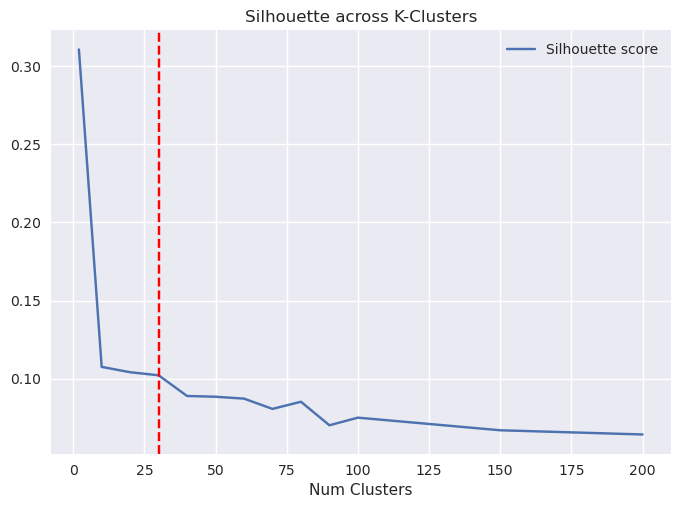

In [13]:
pd.DataFrame([k_range,silhouette_scores]).T.rename(columns={0:'Num Clusters',1:'Silhouette score'}).set_index('Num Clusters').plot.line(title='Silhouette across K-Clusters')
plt.axvline(x=30, color='red', linestyle='--')
plt.show()
plt.close()

In [14]:
kmeans = KMeans().setK(30).setSeed(1)
model = kmeans.fit(result.withColumnRenamed("pca_features","features"))
predictions = model.transform(result.withColumnRenamed("pca_features","features"))

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))
silhouette_scores.append(silhouette)


Silhouette with squared euclidean distance = 0.10213219790687969


In [15]:
trunc_pred = predictions[['_c0','EMBEDDING','prediction']].withColumnRenamed("_c0","_c0_pred")

In [16]:
trunc_pred.show()

+--------+--------------------+----------+
|_c0_pred|           EMBEDDING|prediction|
+--------+--------------------+----------+
|8jszy62z|[1.81392896175384...|         1|
|m03w7f5j|[-0.3659326434135...|        12|
|wj5vhvxx|[-1.5713391304016...|        29|
|h0gs2pz7|[-0.2809154093265...|         9|
|566ll8oi|[1.57514643669128...|        16|
|mdmqcvww|[-1.8470623493194...|        27|
|975u2k0s|[-3.7059042453765...|         7|
|l8a7lzhb|[-6.7001314163208...|        29|
|421vcmz1|[-4.2648954391479...|         8|
|rcx450b6|[-1.6233532428741...|        28|
|g754gjvh|[-0.4169462025165...|        13|
|t489ut8z|[-2.4220397472381...|        18|
|pi7lekcp|[0.56459283828735...|        16|
|nznqdtq1|[-2.6714475154876...|        23|
|hk0hu2yo|[-4.0184741020202...|        22|
|sf7c34lj|[-1.3721044063568...|        29|
|1oeeqaep|[2.34631443023681...|        24|
|u7zxjwkg|[-1.5488121509552...|        23|
|qvny4ci3|[-0.0755093097686...|        22|
|x2mtxmus|[-2.1194081306457...|        28|
+--------+-

In [17]:
sample_seed_1_cluser_assinged = sample_seed_1.join(trunc_pred[['_c0_pred','prediction']],
                                                   sample_seed_1["_c0"] == trunc_pred["_c0_pred"],"left")

In [18]:
sample_seed_1_cluser_assinged.show()

+--------+--------------------+--------------------+--------+----------+
|     _c0|           EMBEDDING|        pca_features|_c0_pred|prediction|
+--------+--------------------+--------------------+--------+----------+
|00a19z5i|[-4.0260972976684...|[50.1645298208696...|00a19z5i|        28|
|03er0xjy|[2.24352216720581...|[30.0484083110016...|03er0xjy|        24|
|04uf62g7|[-3.8663520812988...|[40.6927201762211...|04uf62g7|         7|
|06ol4igi|[1.53384220600128...|[26.3340807172713...|06ol4igi|        15|
|08k3r476|[-3.7902088165283...|[28.3916017481520...|08k3r476|        23|
|08lwff2x|[-2.4967875480651...|[29.3963851471754...|08lwff2x|         6|
|09epwbta|[-1.4549742937088...|[-8.5280056591159...|09epwbta|         9|
|0bpse3a0|[1.73539829254150...|[11.7279207596334...|0bpse3a0|        24|
|0jjlrp0l|[2.92487478256225...|[-13.342124538388...|0jjlrp0l|        21|
|0vybc2gq|[0.37723752856254...|[-33.476009799680...|0vybc2gq|        16|
|13sr3wey|[-4.7930393218994...|[33.0979729283422...

In [1]:
def get_tsne_spark_api(sample_seed_1_cluser_assinged):
    df = pd.DataFrame(sample_seed_1_cluser_assinged[['_c0','EMBEDDING','prediction']].collect())
    X = [np.array(i) for i in df[1].values]
    X = np.array(X)
    X_embedded = TSNE(n_components=2).fit_transform(X)
    TSNE_2d = pd.DataFrame(X_embedded)
    TSNE_2d['cluster']= df[2].values
    
    c_map_opt = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

#for cmap in c_map_opt:

    pd.DataFrame(TSNE_2d).plot.scatter(x=0,y=1,c='cluster', cmap='Paired', s=10,figsize=(40,20))
    plt.show()
    plt.close()

    

In [19]:
df = pd.DataFrame(sample_seed_1_cluser_assinged[['_c0','EMBEDDING','prediction']].collect())

In [20]:
X = [np.array(i) for i in df[1].values]

In [21]:
X = np.array(X)

In [22]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [23]:
X_embedded.shape

(53152, 2)

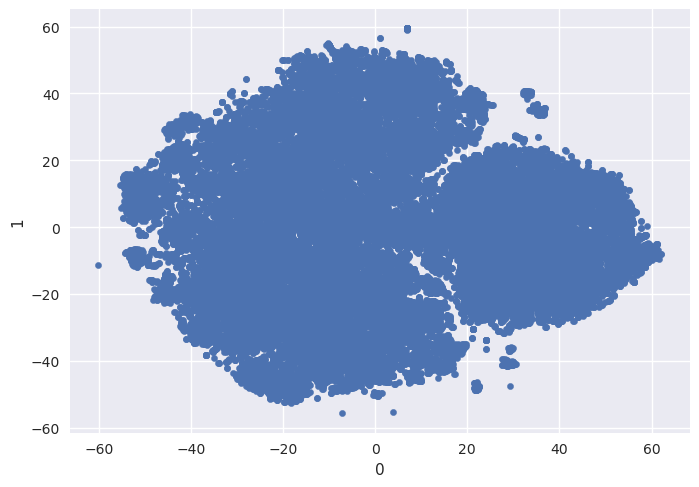

In [24]:
pd.DataFrame(X_embedded).plot.scatter(x=0,y=1)
plt.show()
plt.close()

In [25]:
TSNE_2d = pd.DataFrame(X_embedded)

In [26]:
TSNE_2d['cluster']= df[2].values

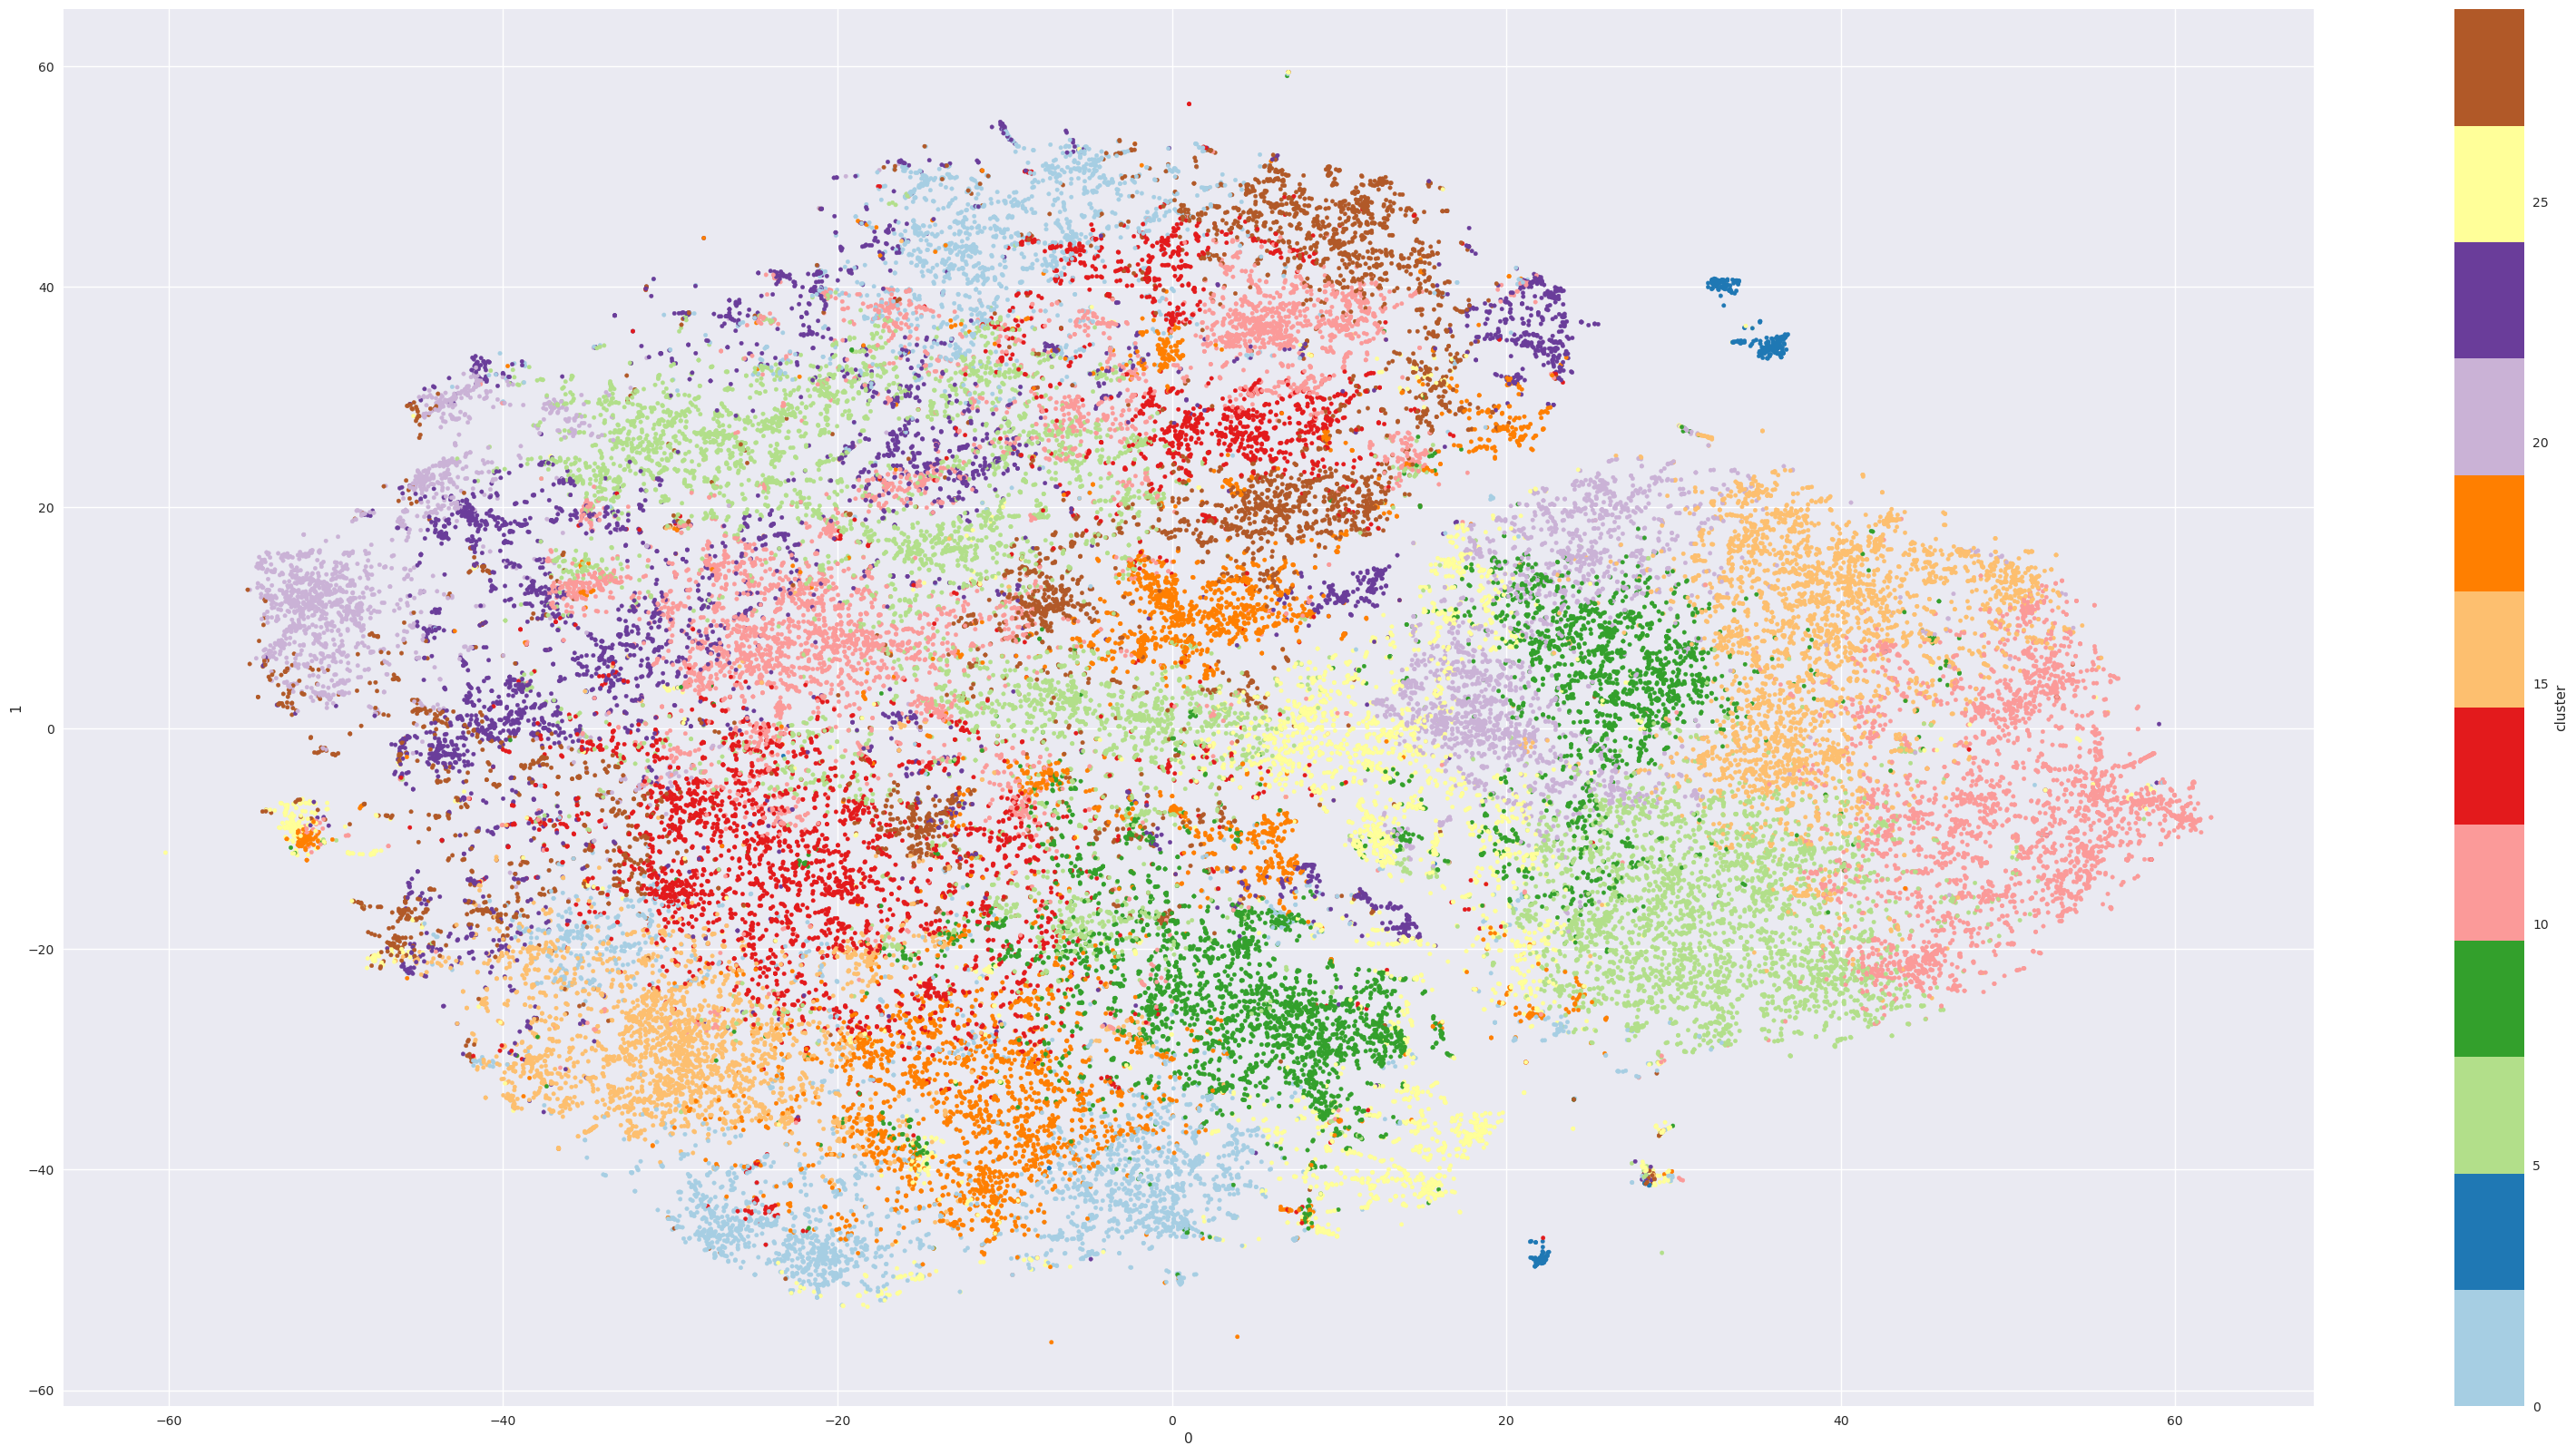

In [27]:
c_map_opt = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

#for cmap in c_map_opt:

pd.DataFrame(TSNE_2d).plot.scatter(x=0,y=1,c='cluster', cmap='Paired', s=10,figsize=(40,20))
plt.show()
plt.close()

In [28]:
TSNE_2d.values

array([[ 11.71233654,  45.6224556 ,  28.        ],
       [ 12.37143707,  13.85988808,  24.        ],
       [-35.20747375,  13.57763577,   7.        ],
       ...,
       [ 38.80793381,   8.20205688,  16.        ],
       [-51.20502472,  -9.87038708,  19.        ],
       [-13.25860977, -35.26684189,  17.        ]])

In [29]:
TSNE_2d.groupby('cluster').first().reset_index()

cluster          0          1
0         0  -0.861396 -40.782455
1         1  -7.002258  47.871708
2         2 -22.125223 -47.935017
3         3  28.528597 -41.441185
4         4  21.984566 -48.165627
5         5  35.826801 -20.449919
6         6  -1.128981  -0.168806
7         7 -35.207474  13.577636
8         8   4.296191 -28.240200
9         9  21.734613  10.425229
10       10 -21.290297  11.336523
11       11   3.798829  37.045170
12       12  48.455994   1.607069
13       13 -25.071966 -18.315491
14       14  -6.842008  43.785179
15       15 -30.610661 -33.495888
16       16  39.084358 -14.417068
17       17 -16.010504 -30.005400
18       18   0.278314  33.847126
19       19   0.772905   8.425762
20       20 -45.777599  17.014708
21       21  27.751207  21.529272
22       22 -36.828247   1.346747
23       23 -10.105342  20.809166
24       24  12.371437  13.859888
25       25 -36.827930   1.346495
26       26  34.708946  36.245640
27       27 -35.786488 -11.818126
28       28  11.712337  45.622456
29       29   6.802985  19.738163

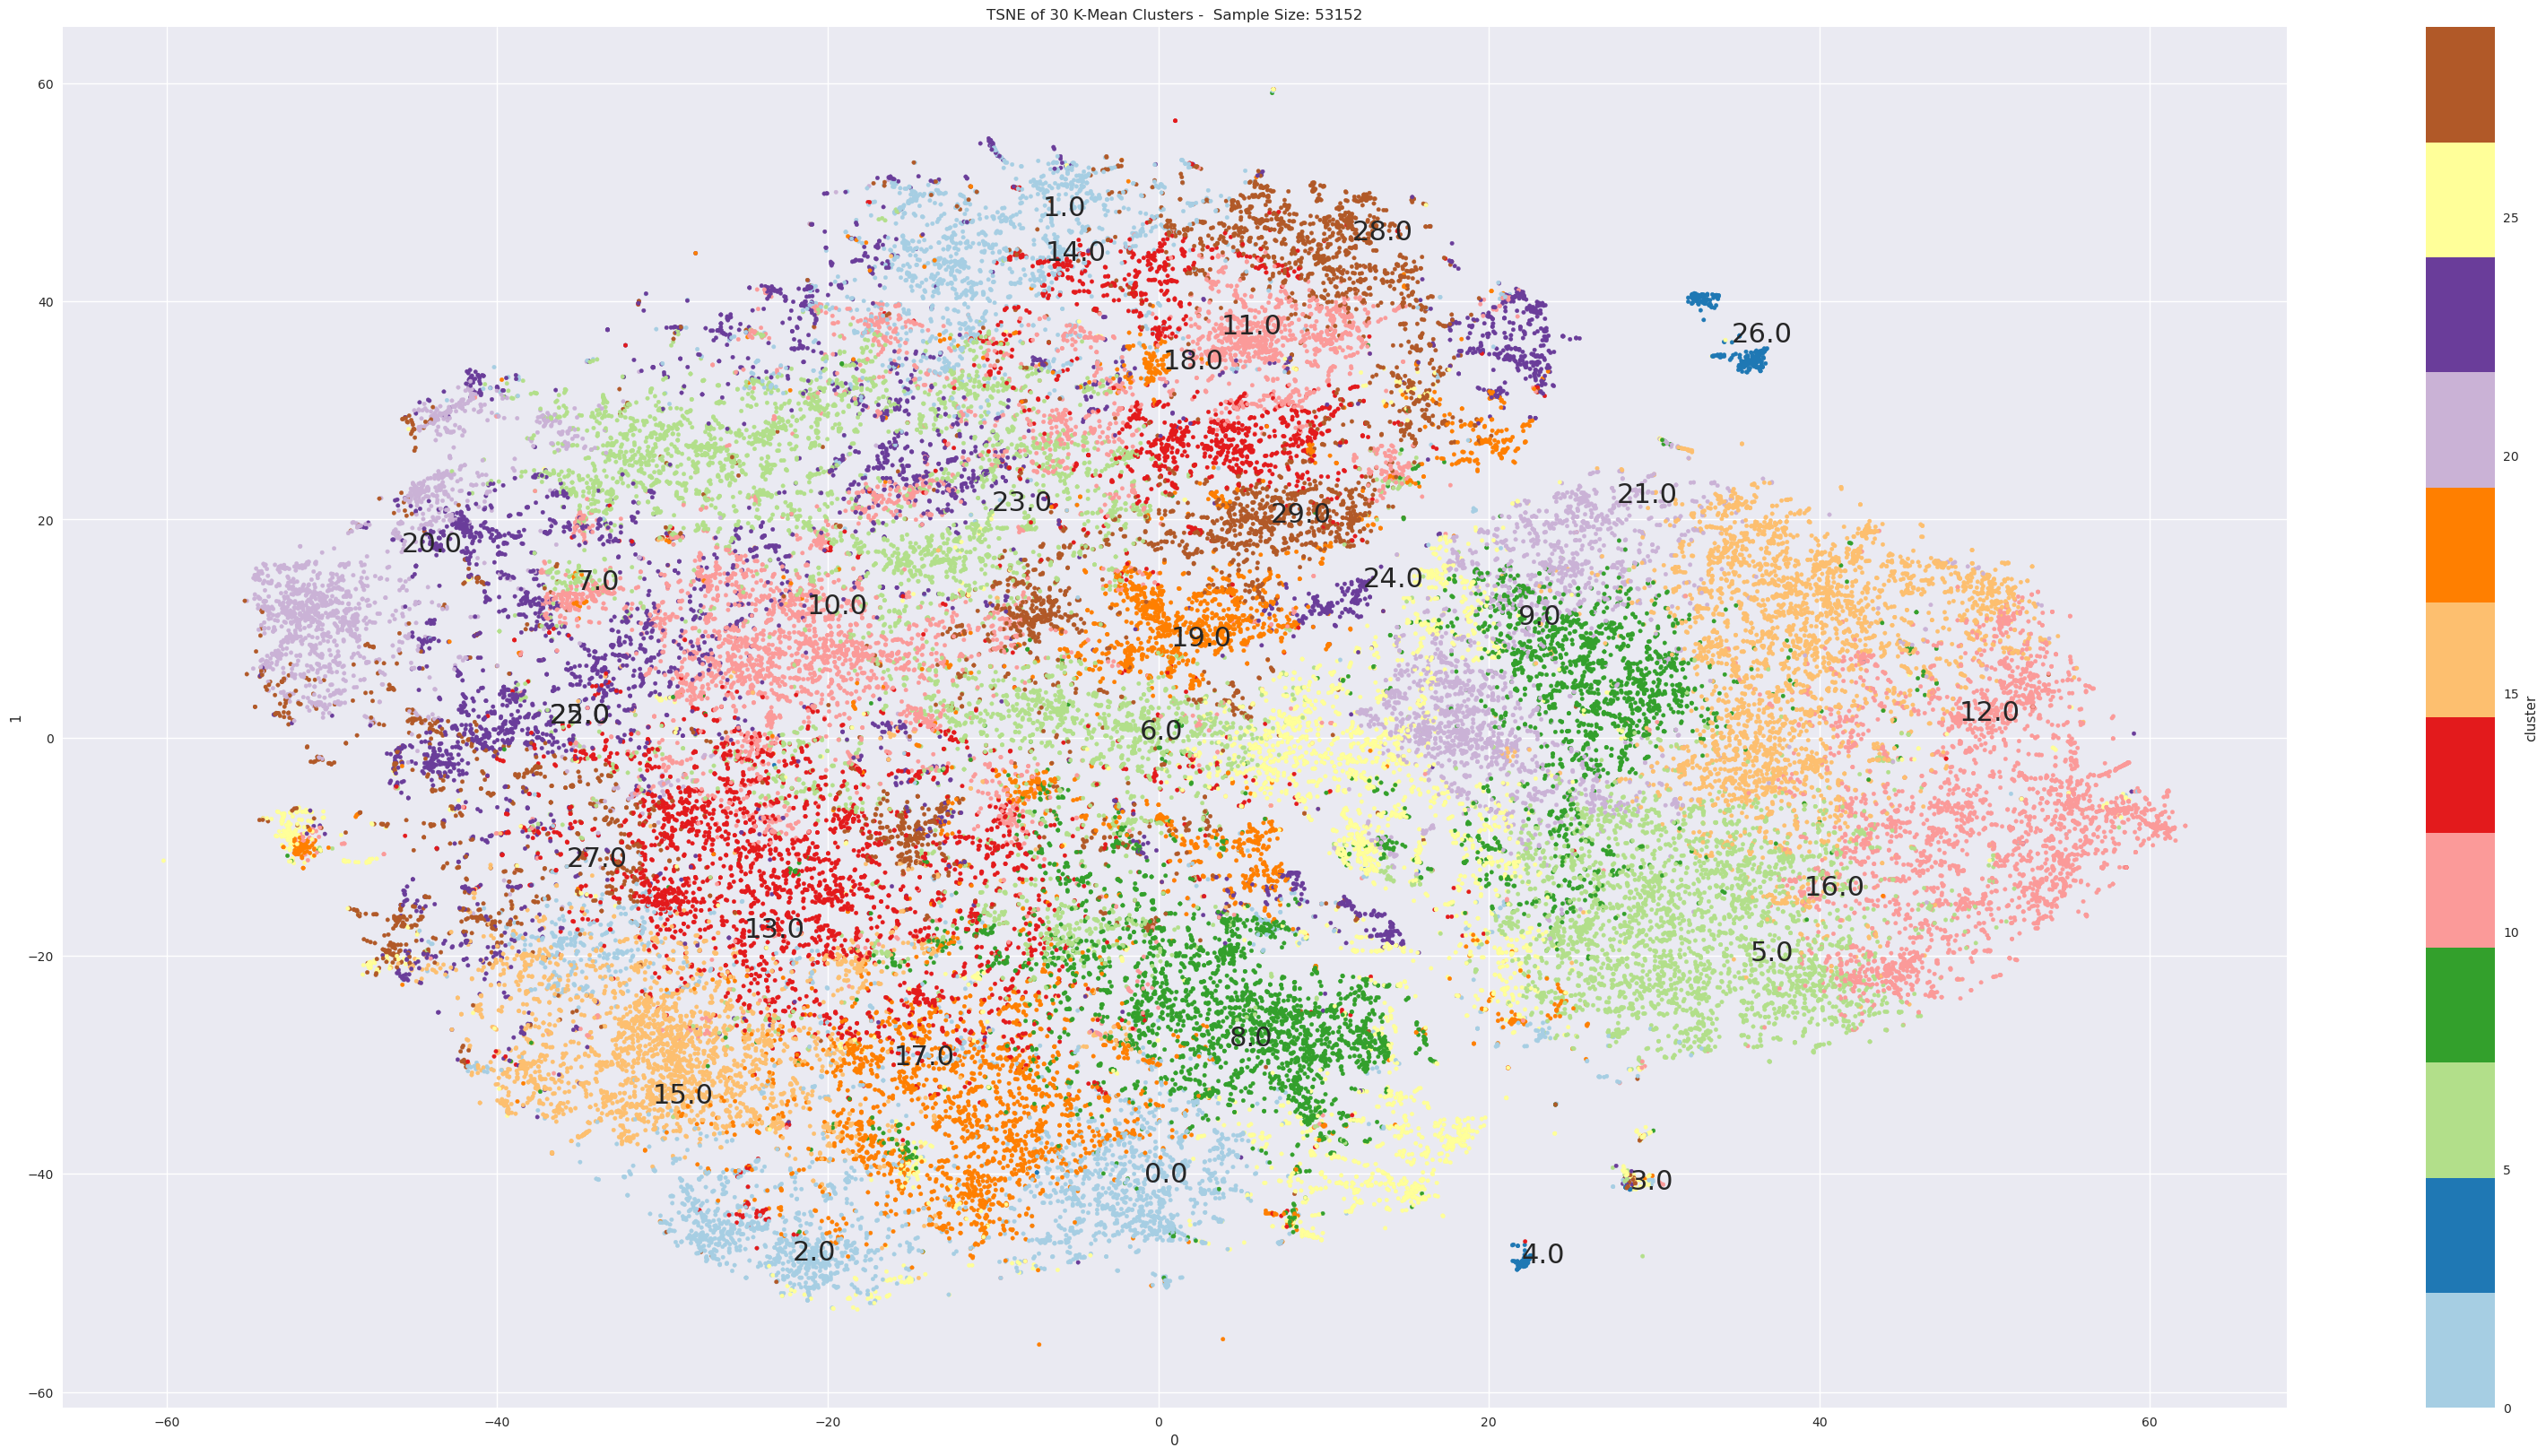

In [40]:

#for cmap in c_map_opt:

ax = TSNE_2d.plot.scatter(x=0,y=1,c='cluster', cmap='Paired', s=10,figsize=(40,20),title = 'TSNE of {} K-Mean Clusters -  Sample Size: {}'.format(len(TSNE_2d.groupby('cluster').first()),len(X_embedded)))


for i, txt in enumerate(TSNE_2d.groupby('cluster').first().reset_index().values):
    ax.annotate(txt[0], (txt[1], txt[2]),fontsize=22)
    
plt.show()
plt.close()

In [31]:
sample_seed_1_cluser_assinged.show()

+--------+--------------------+--------------------+--------+----------+
|     _c0|           EMBEDDING|        pca_features|_c0_pred|prediction|
+--------+--------------------+--------------------+--------+----------+
|00a19z5i|[-4.0260972976684...|[50.1645298208696...|00a19z5i|        28|
|03er0xjy|[2.24352216720581...|[30.0484083110016...|03er0xjy|        24|
|04uf62g7|[-3.8663520812988...|[40.6927201762211...|04uf62g7|         7|
|06ol4igi|[1.53384220600128...|[26.3340807172713...|06ol4igi|        15|
|08k3r476|[-3.7902088165283...|[28.3916017481520...|08k3r476|        23|
|08lwff2x|[-2.4967875480651...|[29.3963851471754...|08lwff2x|         6|
|09epwbta|[-1.4549742937088...|[-8.5280056591159...|09epwbta|         9|
|0bpse3a0|[1.73539829254150...|[11.7279207596334...|0bpse3a0|        24|
|0jjlrp0l|[2.92487478256225...|[-13.342124538388...|0jjlrp0l|        21|
|0vybc2gq|[0.37723752856254...|[-33.476009799680...|0vybc2gq|        16|
|13sr3wey|[-4.7930393218994...|[33.0979729283422...

In [41]:
TSNE_2d['_c0_TSNE'] = df[0].values

In [42]:
TSNE_DF_spark = spark.createDataFrame(TSNE_2d)

/usr/lib/spark/python/pyspark/sql/session.py:714: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


In [45]:
TSNE_DF_spark.show()

+-------------------+--------------------+-------+--------+
|                  0|                   1|cluster|_c0_TSNE|
+-------------------+--------------------+-------+--------+
| 11.712336540222168|   45.62245559692383|     28|00a19z5i|
| 12.371437072753906|  13.859888076782227|     24|03er0xjy|
| -35.20747375488281|  13.577635765075684|      7|04uf62g7|
|-30.610660552978516| -33.495887756347656|     15|06ol4igi|
|-10.105341911315918|  20.809165954589844|     23|08k3r476|
|-1.1289808750152588|-0.16880646347999573|      6|08lwff2x|
|   21.7346134185791|    10.4252290725708|      9|09epwbta|
| 24.484352111816406|    36.8057746887207|     24|0bpse3a0|
|  27.75120735168457|  21.529272079467773|     21|0jjlrp0l|
|  39.08435821533203| -14.417068481445312|     16|0vybc2gq|
| -25.07196617126465|  -18.31549072265625|     13|13sr3wey|
|  48.45599365234375|  1.6070688962936401|     12|18dkbyh0|
|  -35.7864875793457|  -11.81812572479248|     27|23j09kzq|
|  6.802985191345215|  19.73816299438476

In [46]:
sample_seed_1_cluser_assinged_TSNE = sample_seed_1_cluser_assinged.join(TSNE_DF_spark,
                                                   sample_seed_1_cluser_assinged["_c0"] == TSNE_DF_spark["_c0_TSNE"],"left")


In [47]:
sample_seed_1_cluser_assinged_TSNE.show()

+--------+--------------------+--------------------+--------+----------+-------------------+--------------------+-------+--------+
|     _c0|           EMBEDDING|        pca_features|_c0_pred|prediction|                  0|                   1|cluster|_c0_TSNE|
+--------+--------------------+--------------------+--------+----------+-------------------+--------------------+-------+--------+
|00a19z5i|[-4.0260972976684...|[50.1645298208696...|00a19z5i|        28| 11.712336540222168|   45.62245559692383|     28|00a19z5i|
|03er0xjy|[2.24352216720581...|[30.0484083110016...|03er0xjy|        24| 12.371437072753906|  13.859888076782227|     24|03er0xjy|
|04uf62g7|[-3.8663520812988...|[40.6927201762211...|04uf62g7|         7| -35.20747375488281|  13.577635765075684|      7|04uf62g7|
|06ol4igi|[1.53384220600128...|[26.3340807172713...|06ol4igi|        15|-30.610660552978516| -33.495887756347656|     15|06ol4igi|
|08k3r476|[-3.7902088165283...|[28.3916017481520...|08k3r476|        23|-10.1053419

In [48]:
sample_seed_1_cluser_assinged_TSNE.write.parquet("s3://hids511final/corid_embedding_pca_200_sample_seed_01_1_KMEANS_PRED_DISTINCT_TSNE.parquet")

In [50]:
sample_seed_20_percent = result[['_c0','EMBEDDING','pca_features']].sample(.2,1)

sample_seed_20_percent_cluster_assigned = sample_seed_20_percent.join(trunc_pred[['_c0_pred','prediction']],
                                                   sample_seed_20_percent["_c0"] == trunc_pred["_c0_pred"],"left")


In [51]:
df = pd.DataFrame(sample_seed_20_percent_cluster_assigned[['_c0','EMBEDDING','prediction']].collect())

X = [np.array(i) for i in df[1].values]

X = np.array(X)

X.shape

(106390, 768)

In [52]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [53]:
X_embedded.shape

(106390, 2)

In [54]:
TSNE_2d = pd.DataFrame(X_embedded)

In [55]:
TSNE_2d['cluster']= df[2].values

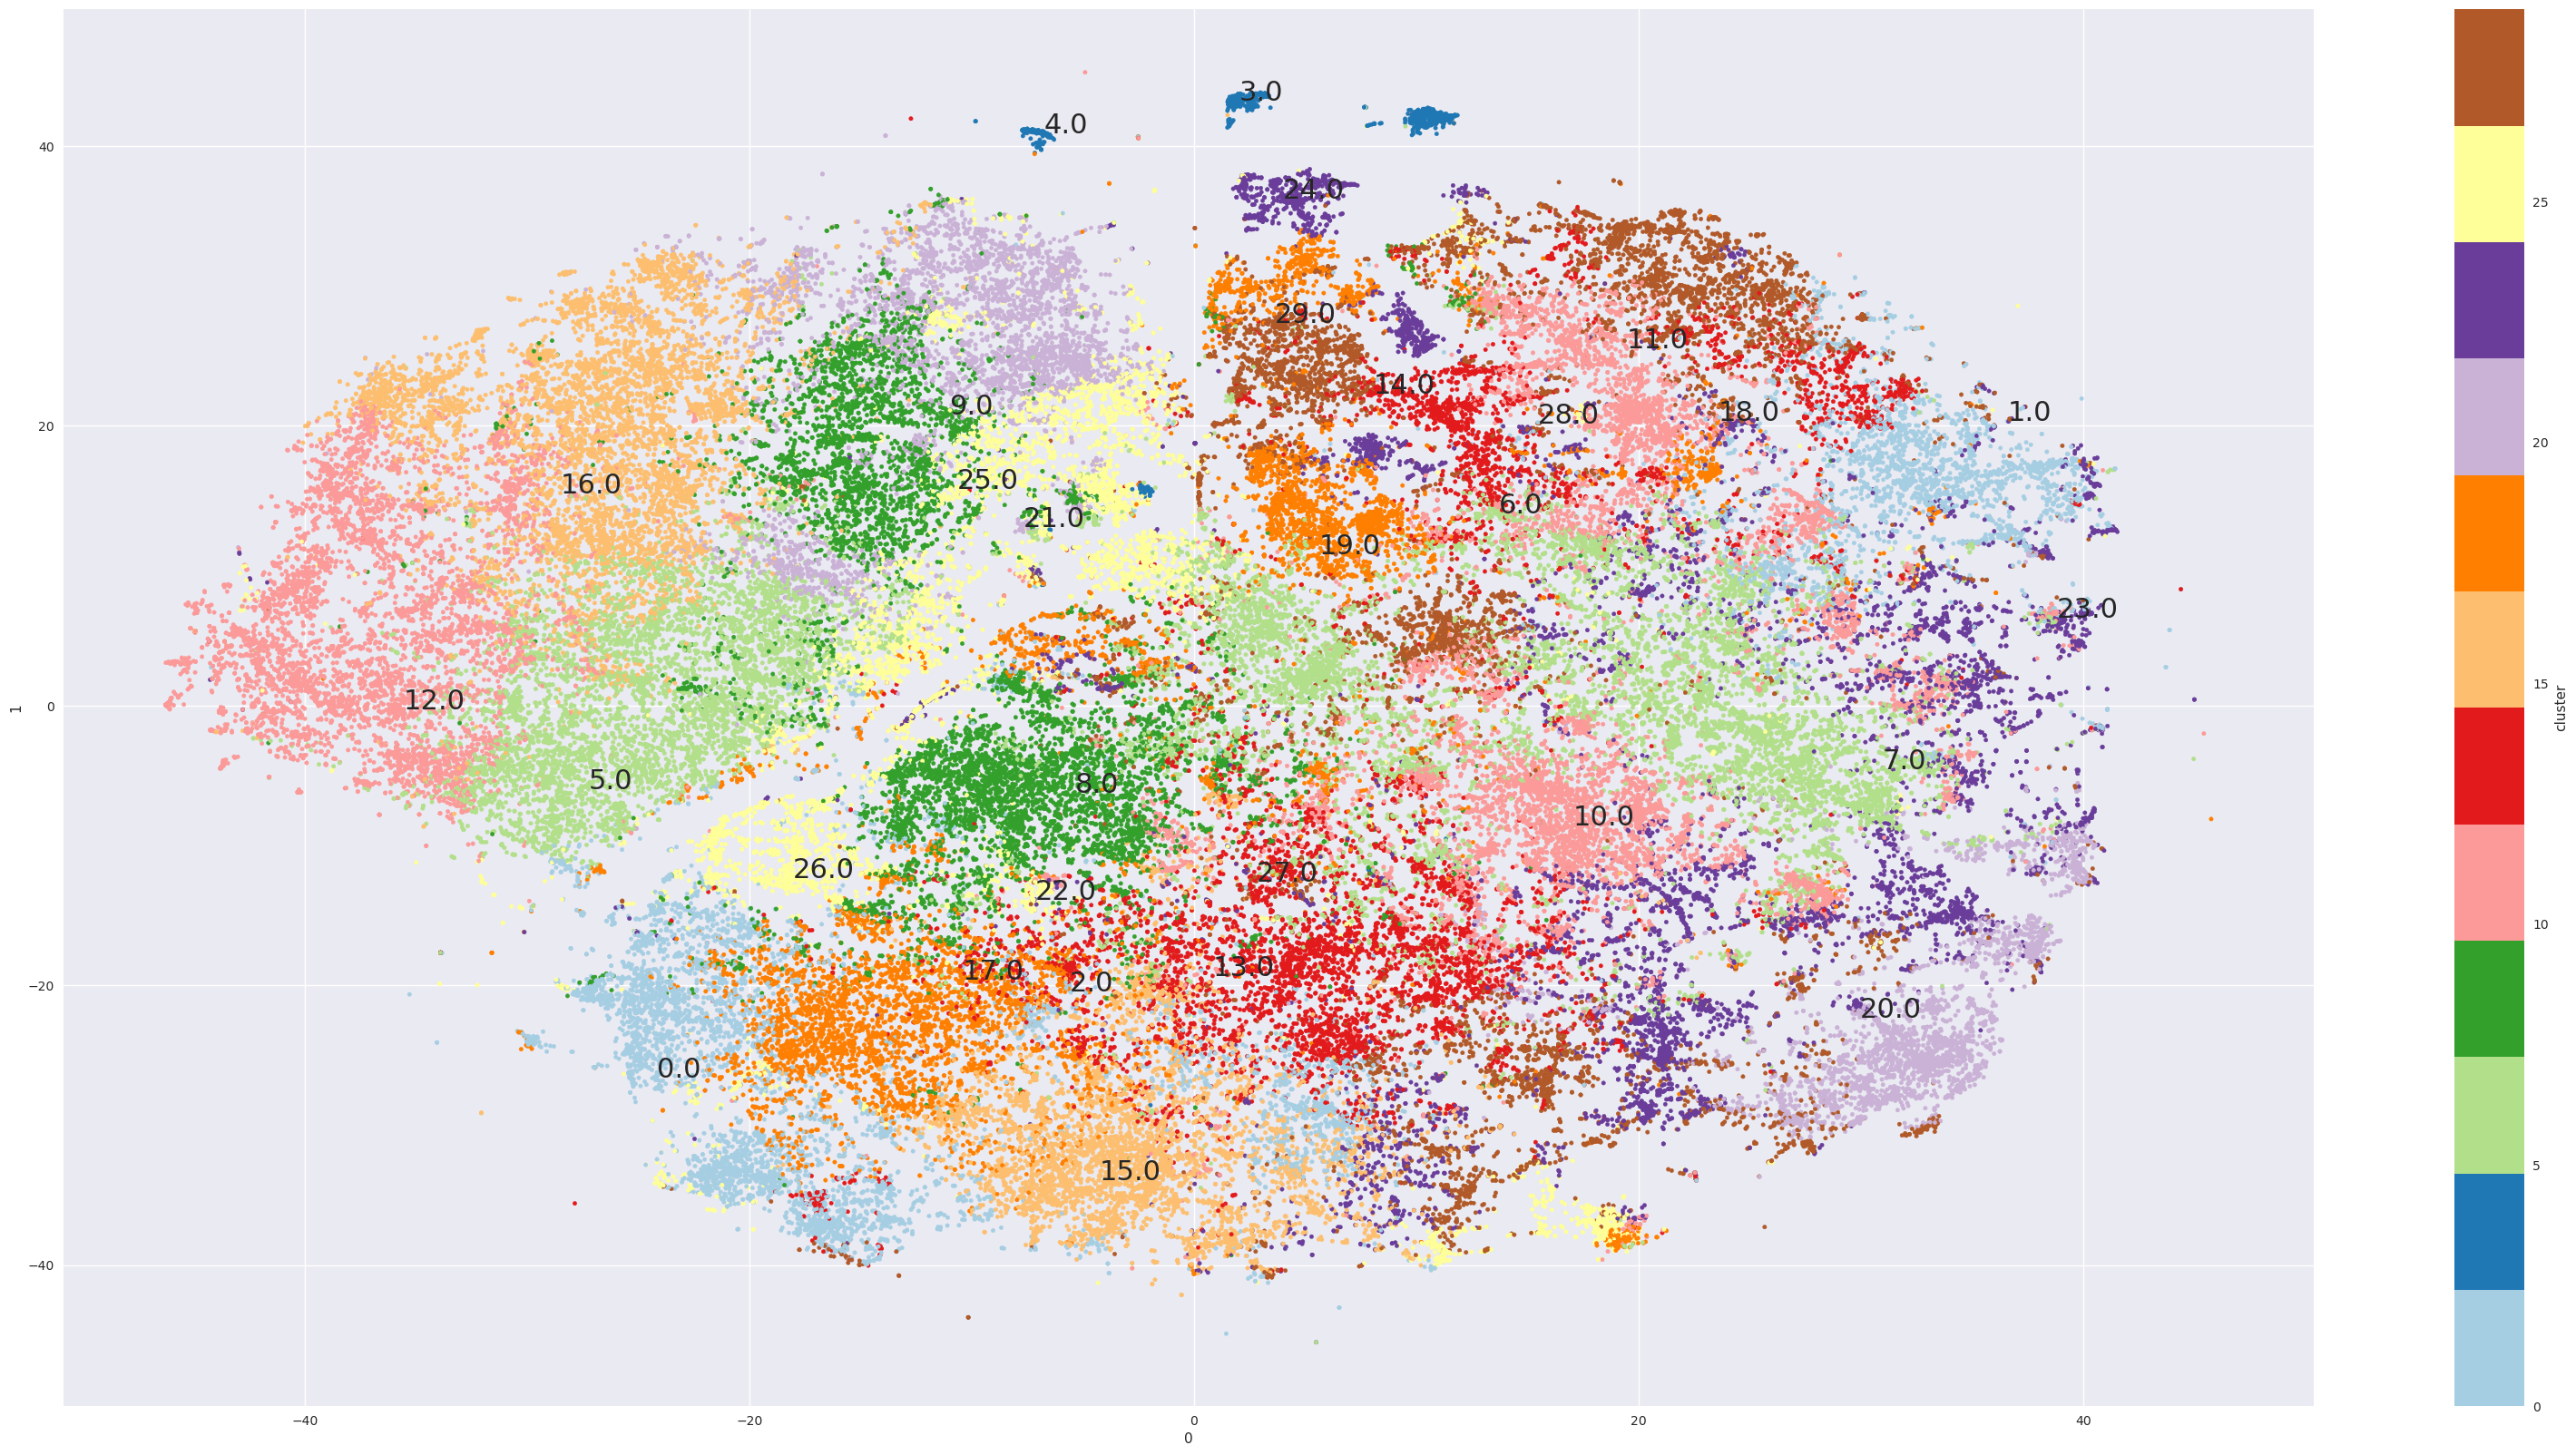

In [56]:

#for cmap in c_map_opt:

ax = TSNE_2d.plot.scatter(x=0,y=1,c='cluster', cmap='Paired', s=10,figsize=(40,20))


for i, txt in enumerate(TSNE_2d.groupby('cluster').first().reset_index().values):
    ax.annotate(txt[0], (txt[1], txt[2]),fontsize=22)
    
plt.show()
plt.close()

In [57]:
from pyspark.sql.functions import lit

In [58]:
TSNE_2d['_c0_TSNE'] = df[0].values

In [ ]:
TSNE_2d['_c0_TSNE'] = df[0].values
TSNE_DF_spark_20 = spark.createDataFrame(TSNE_2d)

sample_seed_20_percent_cluster_assigned_TSNE = sample_seed_20_percent_cluster_assigned.join(TSNE_DF_spark_20,
                                                   sample_seed_20_percent_cluster_assigned["_c0"] == TSNE_DF_spark_20["_c0_TSNE"],"left")



In [ ]:
sample_seed_20_percent_cluster_assigned_TSNE.show()

In [ ]:
sample_seed_20_percent_cluster_assigned_TSNE.write.parquet("s3://hids511final/corid_embedding_pca_200_sample_seed_02_1_KMEANS_PRED_DISTINCT_TSNE.parquet")

In [ ]:
sc.stop()

In [ ]:
spark.stop()

In [ ]:
z